**Feature Cross: Cruzando Informações para Melhorar as Previsões**

Imagine que você está tentando prever se uma pessoa vai gostar de um filme.

* Você sabe que pessoas que gostam de ação tendem a gostar de filmes de ação.
* Você sabe que pessoas que gostam de comédia tendem a gostar de filmes de comédia.

Mas e se a pessoa só gostar de comédias de ação? Separadamente, "ação" e "comédia" podem não dizer muito sobre esse gosto específico. É a combinação de "ação" e "comédia" que se torna uma dica importante.

Feature Cross é exatamente isso: combinar duas ou mais características para criar uma nova característica que representa a interação entre elas. Essa nova característica pode revelar padrões que não seriam óbvios se as características fossem analisadas isoladamente.

Por que isso é útil?
Modelos de Regressão Linear, por exemplo, são "burros" para capturar interações. Eles tratam cada característica de forma independente. Ao criar um Feature Cross, você está essencialmente "ensinando" o modelo sobre essa interação complexa.

Exemplos de Feature Cross:
* Geográfico: Cidade X Bairro (A combinação específica de cidade e bairro pode ser mais preditiva do que cada um isoladamente).
* Tempo: Dia da Semana X Hora do Dia (O tráfego é diferente na 'terça-feira às 8h da manhã' do que na 'terça-feira às 8h da noite' ou 'sábado às 8h da manhã').
* Interações de Produto: Produto A X Produto B (Clientes que compram A e B juntos podem ter um perfil muito específico).
* Numérico x Categórico: Idade X Gênero (A resposta a um tratamento médico pode ser diferente para 'mulheres jovens' vs 'mulheres idosas' ou 'homens jovens').

Iniciando a demonstração didática de FEATURE CROSS...

PASSO 1: Geramos dados de clientes.
  - Temos 'Idade', 'Tipo de Dispositivo' e se o cliente 'Clicou no Anúncio'.
  - A 'regra secreta' é que 'Jovens' (Idade < 30) em 'Celular' têm uma taxa de clique MUITO maior.
  Amostra dos dados:
   Idade Tipo_Dispositivo  Clicou_Anuncio
0     56          Celular               0
1     69          Desktop               0
2     46          Desktop               0
3     32          Desktop               0
4     60          Desktop               0

---------------------------------------------------

PASSO 2: Transformamos 'Tipo_Dispositivo' em números (One-Hot Encoding).
  -> Criamos novas colunas (ex: Tipo_Dispositivo_Celular) onde 1 significa 'sim' e 0 'não'.
  Dados prontos para o modelo (sem Feature Cross):
   Idade  Tipo_Dispositivo_Celular  Tipo_Dispositivo_Desktop  \
0     56                       1.0                       0.0   
1     69                       0.0                       1.0  

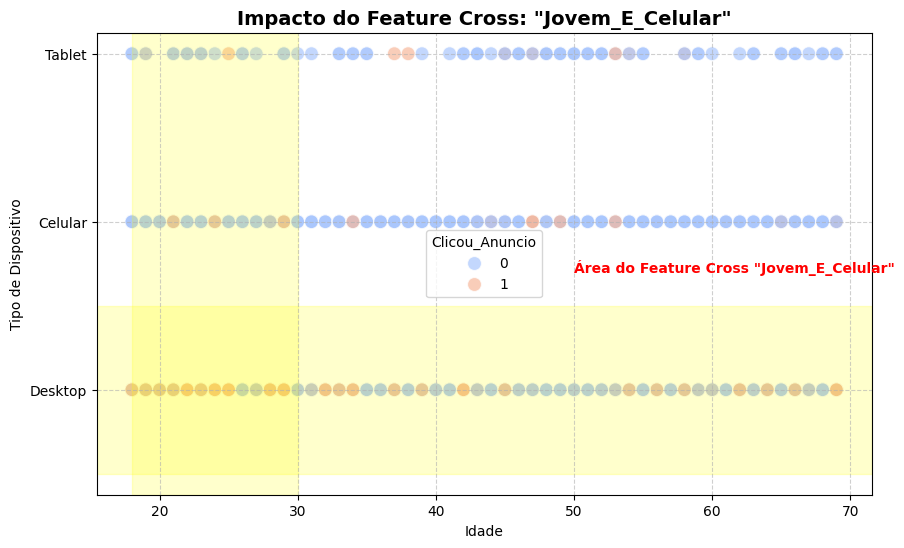


--- RESUMO FINAL ---
No gráfico, você vê que a área amarela (Jovem_E_Celular) é onde a taxa de cliques é mais alta.
O **Feature Cross** é como se o modelo tivesse uma 'luz' que se acende exatamente nessa área.
- **Sem Feature Cross:** O modelo tem que tentar descobrir essa combinação complexa por conta própria, o que é difícil.
- **Com Feature Cross:** O modelo recebe essa 'luz' como uma nova e poderosa dica. Ele pode simplesmente aprender: 'Se a luz 'Jovem_E_Celular' estiver acesa, o cliente provavelmente vai clicar muito!'

Isso torna o aprendizado muito mais fácil e preciso para o modelo, pois você explicitamente forneceu uma característica que captura uma interação importante entre os dados.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder # Para transformar categorias em números

print("Iniciando a demonstração didática de FEATURE CROSS...\n")

# --- 1. Geração de Dados Sintéticos ---
np.random.seed(42)
n_samples = 1000

# Características:
# 'Idade': Contínua
idades = np.random.randint(18, 70, n_samples)

# 'Tipo_Dispositivo': Categórica
dispositivos = np.random.choice(['Desktop', 'Celular', 'Tablet'], n_samples, p=[0.4, 0.5, 0.1])

# 'Clicou_Anuncio' (Target): Criar uma regra onde 'Celular' e 'Idade < 30' têm mais cliques
# A regra secreta que o modelo precisa aprender
prob_clique = np.zeros(n_samples)
for i in range(n_samples):
    if dispositivos[i] == 'Celular' and idades[i] < 30:
        prob_clique[i] = 0.7  # Jovens em celular clicam muito
    elif dispositivos[i] == 'Celular':
        prob_clique[i] = 0.3  # Outros em celular clicam médio
    elif idades[i] < 30:
        prob_clique[i] = 0.2  # Jovens em outros dispositivos clicam pouco
    else:
        prob_clique[i] = 0.1  # Outros clicam menos

clicou_anuncio = (np.random.rand(n_samples) < prob_clique).astype(int)

# Criar um DataFrame para facilitar a manipulação
df = pd.DataFrame({'Idade': idades, 'Tipo_Dispositivo': dispositivos, 'Clicou_Anuncio': clicou_anuncio})

print("PASSO 1: Geramos dados de clientes.")
print("  - Temos 'Idade', 'Tipo de Dispositivo' e se o cliente 'Clicou no Anúncio'.")
print("  - A 'regra secreta' é que 'Jovens' (Idade < 30) em 'Celular' têm uma taxa de clique MUITO maior.")
print(f"  Amostra dos dados:\n{df.head()}\n")
print("---------------------------------------------------\n")

# --- 2. Preparação dos Dados (One-Hot Encoding para Tipo_Dispositivo) ---
# Transformar a característica categórica 'Tipo_Dispositivo' em números.

print("PASSO 2: Transformamos 'Tipo_Dispositivo' em números (One-Hot Encoding).")
print("  -> Criamos novas colunas (ex: Tipo_Dispositivo_Celular) onde 1 significa 'sim' e 0 'não'.")

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
device_encoded = encoder.fit_transform(df[['Tipo_Dispositivo']])
device_df = pd.DataFrame(device_encoded, columns=encoder.get_feature_names_out(['Tipo_Dispositivo']))

# Juntar com a Idade
X_original = pd.concat([df[['Idade']], device_df], axis=1)
y = df['Clicou_Anuncio']

print(f"  Dados prontos para o modelo (sem Feature Cross):\n{X_original.head()}\n")
print("---------------------------------------------------\n")

# --- 3. Treinar Modelo SEM Feature Cross ---
# O modelo tenta aprender a regra "secreta" usando as características separadamente.

print("PASSO 3: Treinamos um Modelo SEM Feature Cross (Modelo Simples).")
print("  -> Ele vê a 'Idade' e o 'Tipo de Dispositivo' como informações separadas.")

X_train_no_cross, X_test_no_cross, y_train_no_cross, y_test_no_cross = train_test_split(
    X_original, y, test_size=0.3, random_state=42, stratify=y
)

model_no_cross = LogisticRegression(solver='liblinear', random_state=42)
model_no_cross.fit(X_train_no_cross, y_train_no_cross)
y_pred_no_cross = model_no_cross.predict(X_test_no_cross)

print(f"  Acurácia do Modelo SEM Feature Cross: {accuracy_score(y_test_no_cross, y_pred_no_cross):.4f}")
print("  Relatório de Classificação SEM Feature Cross:")
print(classification_report(y_test_no_cross, y_pred_no_cross))
print("  (Observe que ele pode não ser ótimo em prever a Classe 1, pois não 'entende' a interação.)")
print("---------------------------------------------------\n")


# --- 4. Criar o FEATURE CROSS ---
# Criamos uma nova característica que representa a combinação 'Jovem E Celular'.

print("PASSO 4: Criamos um FEATURE CROSS: 'Jovem_E_Celular'.")
print("  -> Esta é uma NOVA CARACTERÍSTICA que acende (valor 1) SÓ QUANDO a Idade é < 30 E o Dispositivo é 'Celular'.")

# Criando a nova característica
df['Jovem_E_Celular'] = ((df['Idade'] < 30) & (df['Tipo_Dispositivo'] == 'Celular')).astype(int)

# Preparar o novo X com o Feature Cross
X_with_cross = pd.concat([X_original, df[['Jovem_E_Celular']]], axis=1)

print(f"  Dados prontos para o modelo (COM Feature Cross):\n{X_with_cross.head()}\n")
print("---------------------------------------------------\n")

# --- 5. Treinar Modelo COM Feature Cross ---
# Agora o modelo tem uma característica explícita para a interação.

print("PASSO 5: Treinamos um Modelo COM Feature Cross (Modelo Mais Inteligente).")
print("  -> Ele agora tem uma dica direta sobre a combinação 'Jovem_E_Celular'.")

X_train_with_cross, X_test_with_cross, y_train_with_cross, y_test_with_cross = train_test_split(
    X_with_cross, y, test_size=0.3, random_state=42, stratify=y
)

model_with_cross = LogisticRegression(solver='liblinear', random_state=42)
model_with_cross.fit(X_train_with_cross, y_train_with_cross)
y_pred_with_cross = model_with_cross.predict(X_test_with_cross)

print(f"  Acurácia do Modelo COM Feature Cross: {accuracy_score(y_test_with_cross, y_pred_with_cross):.4f}")
print("  Relatório de Classificação COM Feature Cross:")
print(classification_report(y_test_with_cross, y_pred_with_cross))
print("  (Compare a acurácia e o 'recall' da Classe 1 com o modelo anterior. Deve ter melhorado significativamente!)")
print("---------------------------------------------------\n")


# --- 6. Visualização do Impacto do Feature Cross ---
# Para simplificar a visualização, vamos focar em como o Feature Cross 'liga' a combinação.

print("PASSO 6: Visualizamos o impacto do Feature Cross (a 'luz' que acende na combinação).")

plt.figure(figsize=(10, 6))
# Criamos subconjuntos para facilitar a visualização
df_mobile_young = df[(df['Idade'] < 30) & (df['Tipo_Dispositivo'] == 'Celular')].copy()
df_mobile_old = df[(df['Idade'] >= 30) & (df['Tipo_Dispositivo'] == 'Celular')].copy()
df_desktop_young = df[(df['Idade'] < 30) & (df['Tipo_Dispositivo'] == 'Desktop')].copy()
df_desktop_old = df[(df['Idade'] >= 30) & (df['Tipo_Dispositivo'] == 'Desktop')].copy()

# Scatter plot com cores para Clicou_Anuncio
sns.scatterplot(x='Idade', y='Tipo_Dispositivo', hue='Clicou_Anuncio', data=df, palette='coolwarm', s=100, alpha=0.7)

# Adicionar retângulos para destacar as regiões
# Região Jovem E Celular
plt.axvspan(18, 30, color='yellow', alpha=0.2)
plt.axhspan(-0.5, 0.5, color='yellow', alpha=0.2) # Aproximado para 'Celular'

# Ajustar os ticks do y-axis para mostrar os nomes dos dispositivos
plt.yticks(ticks=[0, 1, 2], labels=['Desktop', 'Celular', 'Tablet'])
plt.gca().invert_yaxis() # Inverte para 'Celular' ficar em cima

plt.title('Impacto do Feature Cross: "Jovem_E_Celular"', fontsize=14, weight='bold')
plt.xlabel('Idade')
plt.ylabel('Tipo de Dispositivo')
plt.grid(True, linestyle='--', alpha=0.6)
plt.text(50, 0.7, 'Área do Feature Cross "Jovem_E_Celular"', fontsize=10, color='red', weight='bold')
plt.show()

print("\n--- RESUMO FINAL ---")
print("No gráfico, você vê que a área amarela (Jovem_E_Celular) é onde a taxa de cliques é mais alta.")
print("O **Feature Cross** é como se o modelo tivesse uma 'luz' que se acende exatamente nessa área.")
print("- **Sem Feature Cross:** O modelo tem que tentar descobrir essa combinação complexa por conta própria, o que é difícil.")
print("- **Com Feature Cross:** O modelo recebe essa 'luz' como uma nova e poderosa dica. Ele pode simplesmente aprender: 'Se a luz 'Jovem_E_Celular' estiver acesa, o cliente provavelmente vai clicar muito!'")
print("\nIsso torna o aprendizado muito mais fácil e preciso para o modelo, pois você explicitamente forneceu uma característica que captura uma interação importante entre os dados.")